### Created by: Anthony D. Cho
### Last update: 27.11.2021

**Subject**: Classification (CNN - keras, tensorflow) - Flowers Recognition

In [1]:
## Librerias generales
import os
import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from glob import glob
from numpy import zeros, array, argmax, vstack

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Keras tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam

### Customized function

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

**Data source:**

[Flowers classification](https://www.kaggle.com/alxmamaev/flowers-recognition) (Classification)

In [3]:
if not os.path.exists("dataFlowers.zip"):
    ## Download files

    !wget https://github.com/adoc-box/Datasets/raw/main/flowers.zip
    !wget https://github.com/adoc-box/Datasets/raw/main/flowers.z01

    ## join files 
    !zip -F flowers.zip --out dataFlowers.zip

    ## remove some files
    !rm flowers.z01 flowers.zip

    ## un-compress joined zip file
    !unzip dataFlowers.zip
    
else:
    if os.path.exists('data'):
        !rm -r data
        !unzip dataFlowers.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 copying: data/train/rose/3576488381_611f3446e0_n.jpg
 copying: data/train/rose/3624546109_8eb98f0cdb.jpg
 copying: data/train/rose/3634244527_e72c47842c_n.jpg
 copying: data/train/rose/3654988152_b11178bbcb.jpg
 copying: data/train/rose/3655527028_0fab2b547d_n.jpg
 copying: data/train/rose/3661675690_ed2d05fa5f_n.jpg
 copying: data/train/rose/3664842094_5fd60ee26b.jpg
 copying: data/train/rose/3667366832_7a8017c528_n.jpg
 copying: data/train/rose/3873271620_1d9d314f01_n.jpg
 copying: data/train/rose/3909587261_f8cd3e7fe7.jpg
 copying: data/train/rose/394990940_7af082cf8d_n.jpg
 copying: data/train/rose/4061451210_1650590c6a.jpg
 copying: data/train/rose/4093390305_4010c736c9.jpg
 copying: data/train/rose/410421672_563550467c.jpg
 copying: data/train/rose/410425647_4586667858.jpg
 copying: data/train/rose/4242976586_607a8f9843_n.jpg
 copying: data/train/rose/4279989256_9a48c0d194_n.jpg
 copying: data/train/rose/42799908

### Image loading and pre-processing

In [4]:
## Images PATHs
train_dir = 'data/train/'
validation_dir = 'data/validation/'
test_dir = 'data/test/'

## Lista de categorias
categories = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Tamaño de la imagen reajustada
imgSize = 150

## Cargar Train Data
files = glob(f'{train_dir}**/*')
X_train, y_train = zeros((len(files), imgSize, imgSize, 3)), []
for i, file in enumerate(files):

    ## Cargar imagen y reshape
    img = load_img(file, target_size=(imgSize, imgSize))

    ## Convertir de imagen a arreglo
    img = img_to_array(img)

    ## Almacenar matriz de imagen
    X_train[i] = img

    ## Almacenar categoria de la imagen
    y_train.append( categories[file.split('/')[-2]] )

## Cargar Validation Data
files = glob(f'{validation_dir}**/*')
X_val, y_val = zeros((len(files), imgSize, imgSize, 3)), []
for i, file in enumerate(files):

    ## Cargar imagen y reshape
    img = load_img(file, target_size=(imgSize, imgSize))

    ## Convertir de imagen a arreglo
    img = img_to_array(img)

    ## Almacenar matriz de imagen
    X_val[i] = img

    ## Almacenar categoria de la imagen
    y_val.append( categories[file.split('/')[-2]] )

## Cargar Test Data
files = glob(f'{test_dir}**/*')
X_test, y_test = zeros((len(files), imgSize, imgSize, 3)), []
for i, file in enumerate(files):

    ## Cargar imagen y reshape
    img = load_img(file, target_size=(imgSize, imgSize))

    ## Convertir de imagen a arreglo
    img = img_to_array(img)

    ## Almacenar matriz de imagen
    X_test[i] = img

    ## Almacenar categoria de la imagen
    y_test.append( categories[file.split('/')[-2]] )

## One-Hot Encode 
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [6]:
## Display data shapes
print('(train) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(val) X: {}, y: {}'.format(X_val.shape, y_val.shape))
print('(test) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train) X: (2313, 150, 150, 3), y: (2313, 5)
(val) X: (554, 150, 150, 3), y: (554, 5)
(test) X: (380, 150, 150, 3), y: (380, 5)


### Model building

In [7]:
## Model design
def get_model():
    """
        CNN Model builder
    """

    ## Model instance

    model = Sequential(name='FlowersRecognition')
    model.add(layers.Conv2D(filters=32, 
                            kernel_size=(3, 3), 
                            activation='relu',
                            input_shape=(150, 150, 3),
                            name='Conv2D_01'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  name='Pooling_01'))
    model.add(layers.Conv2D(filters=64, 
                            kernel_size=(3, 3), 
                            activation='relu',
                            name='Conv2D_02'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  name='Pooling_02'))
    model.add(layers.Conv2D(filters=128, 
                            kernel_size=(3, 3), 
                            activation='relu',
                            name='Conv2D_03'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  name='Pooling_03'))
    model.add(layers.Conv2D(filters=128, 
                            kernel_size=(3, 3), 
                            activation='relu',
                            name='Conv2D_04'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  name='Pooling_04'))
    model.add(layers.Flatten(name='Flatten'))
    model.add(layers.Dense(units=512, 
                          activation='relu',
                          name='Dense_01'))
    model.add(layers.Dense(units=5, 
                          activation='softmax',
                          name='output'))
    
    ## return model 
    return model

In [8]:
## model instance
model = get_model()

model.summary()

Model: "FlowersRecognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_01 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 Pooling_01 (MaxPooling2D)   (None, 74, 74, 32)        0         
                                                                 
 Conv2D_02 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 Pooling_02 (MaxPooling2D)   (None, 36, 36, 64)        0         
                                                                 
 Conv2D_03 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 Pooling_03 (MaxPooling2D)   (None, 17, 17, 128)       0         
                                                                 
 Conv2D_04 (Conv2D)          (None, 15, 15, 128)

In [9]:
start = time()

## Compiler setting
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

## Model fitting
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    batch_size=20, epochs=30, 
                    verbose=1)

timeUp = time()-start
print('\nTime spent[s]: {:.2f}'.format(timeUp))

model.save('ConvNet_simple.h5')

Epoch 1/30
116/116 [==============================] - 15s 49ms/step - loss: 4.1656 - acc: 0.4077 - val_loss: 1.4441 - val_acc: 0.4513
Epoch 2/30
116/116 [==============================] - 5s 41ms/step - loss: 1.0757 - acc: 0.5750 - val_loss: 1.3212 - val_acc: 0.5343
Epoch 3/30
116/116 [==============================] - 5s 40ms/step - loss: 0.8037 - acc: 0.6909 - val_loss: 1.1979 - val_acc: 0.5469
Epoch 4/30
116/116 [==============================] - 5s 41ms/step - loss: 0.5599 - acc: 0.7942 - val_loss: 1.2002 - val_acc: 0.5794
Epoch 5/30
116/116 [==============================] - 5s 41ms/step - loss: 0.3800 - acc: 0.8699 - val_loss: 1.2585 - val_acc: 0.5957
Epoch 6/30
116/116 [==============================] - 5s 41ms/step - loss: 0.2265 - acc: 0.9369 - val_loss: 1.3532 - val_acc: 0.5722
Epoch 7/30
116/116 [==============================] - 5s 41ms/step - loss: 0.1230 - acc: 0.9771 - val_loss: 1.3192 - val_acc: 0.6191
Epoch 8/30
116/116 [==============================] - 5s 41ms/step -

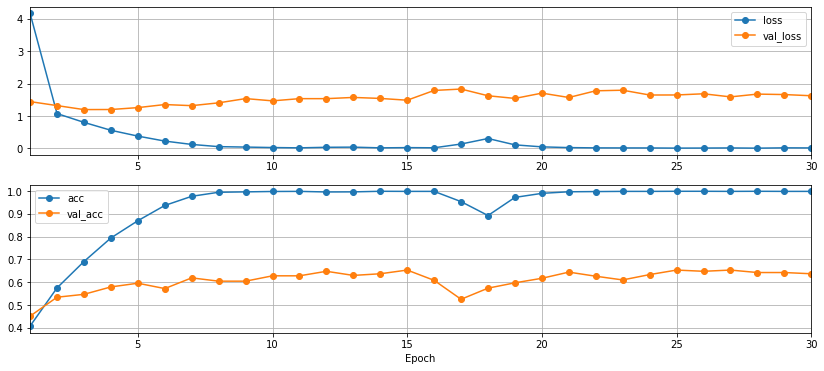

12/12 [==============================] - 1s 47ms/step - loss: 1.5664 - acc: 0.6105
[1.5663766860961914, 0.6105263233184814]


In [10]:
## display performances
plot_history(history, width=14)

## evaluate test set in the model
print(model.evaluate(X_test, y_test))

## Compute prediction using test generator
prediction = model.predict(X_test)

In [12]:
## Decoding labels
y_true = argmax(y_test, axis=1)
prediction_decoded = argmax(prediction, axis=1)

In [13]:
y_true.shape, prediction_decoded.shape

((380,), (380,))

In [14]:
## display confusion matrix
print(confusion_matrix(y_true=y_true, y_pred=prediction_decoded))

## display classification report
print(classification_report(y_true=y_true, y_pred=prediction_decoded))

[[40 13  7  6  4]
 [ 6 61  4 13  6]
 [ 4  5 32  1 28]
 [ 2  3  2 58  6]
 [11  8 18  1 41]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        70
           1       0.68      0.68      0.68        90
           2       0.51      0.46      0.48        70
           3       0.73      0.82      0.77        71
           4       0.48      0.52      0.50        79

    accuracy                           0.61       380
   macro avg       0.61      0.61      0.61       380
weighted avg       0.61      0.61      0.61       380



## Best model

Looking into the performance charts, it seems to stabilize (kind of overfit) starting at epoch 15.

In [15]:
## join train and valide sets
X = vstack([X_train, X_val])
y = vstack([y_train, y_val])

print('X set shape: {}'.format(X.shape))
print('y set shape: {}'.format(y.shape))

X set shape: (2867, 150, 150, 3)
y set shape: (2867, 5)


In [16]:
## Model instance
model = get_model()

model.summary()

Model: "FlowersRecognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_01 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 Pooling_01 (MaxPooling2D)   (None, 74, 74, 32)        0         
                                                                 
 Conv2D_02 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 Pooling_02 (MaxPooling2D)   (None, 36, 36, 64)        0         
                                                                 
 Conv2D_03 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 Pooling_03 (MaxPooling2D)   (None, 17, 17, 128)       0         
                                                                 
 Conv2D_04 (Conv2D)          (None, 15, 15, 128)

In [17]:
start = time()

## Compiler setting
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

## Model fitting
history = model.fit(X, y, 
                    batch_size=20, epochs=15, 
                    verbose=1)

timeUp = time()-start
print('\nTime spent[s]: {:.2f}'.format(timeUp))

model.save('ConvNet_simple.h5')

Epoch 1/15
144/144 [==============================] - 6s 40ms/step - loss: 3.7660 - acc: 0.4015
Epoch 2/15
144/144 [==============================] - 5s 37ms/step - loss: 1.0760 - acc: 0.5759
Epoch 3/15
144/144 [==============================] - 5s 37ms/step - loss: 0.7900 - acc: 0.6833
Epoch 4/15
144/144 [==============================] - 5s 37ms/step - loss: 0.5906 - acc: 0.7792
Epoch 5/15
144/144 [==============================] - 5s 37ms/step - loss: 0.3940 - acc: 0.8713
Epoch 6/15
144/144 [==============================] - 5s 37ms/step - loss: 0.2818 - acc: 0.9114
Epoch 7/15
144/144 [==============================] - 5s 37ms/step - loss: 0.2279 - acc: 0.9358
Epoch 8/15
144/144 [==============================] - 5s 37ms/step - loss: 0.1061 - acc: 0.9791
Epoch 9/15
144/144 [==============================] - 5s 37ms/step - loss: 0.0817 - acc: 0.9836
Epoch 10/15
144/144 [==============================] - 5s 37ms/step - loss: 0.0607 - acc: 0.9916
Epoch 11/15
144/144 [==================

In [18]:
## evaluate test set in the model
print(model.evaluate(X_test, y_test))

## Compute prediction using test generator
prediction = model.predict(X_test)

## Decoding labels
y_true = argmax(y_test, axis=1)
prediction_decoded = argmax(prediction, axis=1)

12/12 [==============================] - 0s 23ms/step - loss: 1.7671 - acc: 0.5737
[1.7671310901641846, 0.5736842155456543]


In [19]:
## display confusion matrix
print(confusion_matrix(y_true=y_true, y_pred=prediction_decoded))

## display classification report
print(classification_report(y_true=y_true, y_pred=prediction_decoded))

[[21  9  6  8 26]
 [ 0 56  3 15 16]
 [ 2  5 27  1 35]
 [ 0  1  1 61  8]
 [ 4  5  9  8 53]]
              precision    recall  f1-score   support

           0       0.78      0.30      0.43        70
           1       0.74      0.62      0.67        90
           2       0.59      0.39      0.47        70
           3       0.66      0.86      0.74        71
           4       0.38      0.67      0.49        79

    accuracy                           0.57       380
   macro avg       0.63      0.57      0.56       380
weighted avg       0.63      0.57      0.57       380

